[Return to Python Page](https://social-lorax.github.io/guides/index_py.html)

<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/header.jpg?raw=true" style="width: 800px;">

<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/stats/stats_underlines.gif?raw=true" style="height: 150px; width: 800px;">

In [1]:
from gapminder import gapminder

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import math

import matplotlib.pylab as plt
import seaborn as sns #
%matplotlib inline

import warnings

# Background

### Definition

A computer program is said to learn from experience **E** with respect to some class of tasks **T** and performance measure **P**, if its performance on **T**, as measured by **P**, improves with **E**.

<br>

### Types

<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/supervised.png?raw=true" style="width: 800px;">
<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/unsupervised.png?raw=true" style="width: 800px;">
<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/reinforcement.png?raw=true" style="width: 800px;">

<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/stats/stats_underlines.gif?raw=true" style="height: 150px; width: 800px;">

# Supervised

### Linear Regression 

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/py_reg1.png?raw=true)

In [2]:
gapminder["logGDP"] = np.log(gapminder["gdpPercap"])

gapminder[["logGDP", "lifeExp"]].head()

,logGDP,lifeExp
0,6.658583,28.801
1,6.710344,30.332
2,6.748878,31.997
3,6.728864,34.020
4,6.606625,36.088


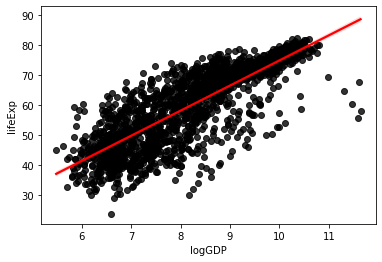

In [3]:
sns.regplot(x = gapminder["logGDP"], y = gapminder["lifeExp"],
           scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.show()

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/py_reg2.png?raw=true)

In [4]:
lm = smf.ols(formula='lifeExp~logGDP', data = gapminder).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3192.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:50:28   Log-Likelihood:                -5877.2
No. Observations:                1704   AIC:                         1.176e+04
Df Residuals:                    1702   BIC:                         1.177e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1009      1.228     -7.413      0.000     -11.509      -6.693
logGDP         8.4051      0.149     56.500      0.000       8.113       8.697
==============================================================================
Omnibus:                      148.382   Durbin-Watson:                   0.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.732
Skew:                          -0.698   Prob(JB):                     2.12e-45
Kurtosis:                       3.973   Cond. No.                         55.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

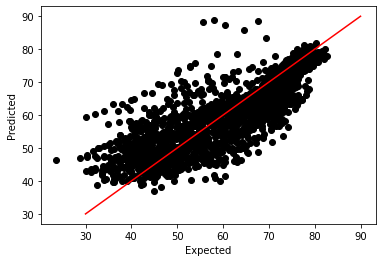

In [5]:
gapminder['predictedLifeExp'] = lm.predict()

plt.scatter(x = gapminder["lifeExp"], y = gapminder["predictedLifeExp"], color = "black")
plt.plot([30, 90], [30, 90], color = "red")

plt.xlabel("Expected")
plt.ylabel("Predicted")

plt.show()

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/py_reg3.png?raw=true)

In [6]:
lm2 = smf.ols(formula='lifeExp~logGDP+year', data = gapminder).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     2153.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:50:31   Log-Likelihood:                -5702.1
No. Observations:                1704   AIC:                         1.141e+04
Df Residuals:                    1701   BIC:                         1.143e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -391.0514     19.418    -20.138      0.000    -429.138    -352.965
logGDP         7.7703      0.138     56.273      0.000       7.499       8.041
year           0.1956      0.010     19.702      0.000       0.176       0.215
==============================================================================
Omnibus:                      149.973   Durbin-Watson:                   0.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.183
Skew:                          -0.699   Prob(JB):                     2.29e-46
Kurtosis:                       4.003   Cond. No.                     2.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

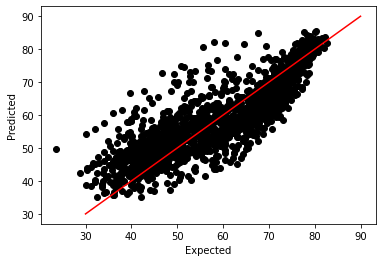

In [7]:
gapminder['predictedLifeExp2'] = lm2.predict()

plt.scatter(x = gapminder["lifeExp"], y = gapminder["predictedLifeExp2"], color = "black")
plt.plot([30, 90], [30, 90], color = "red")

plt.xlabel("Expected")
plt.ylabel("Predicted")

plt.show()

<br>

### Logistic Regression/Classification

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/py_log1.png?raw=true)

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/py_log2.png?raw=true)

![](https://github.com/social-lorax/howto_codebooks/blob/master/images/ml/py_log3.png?raw=true)

<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/stats/stats_underlines.gif?raw=true" style="height: 150px; width: 800px;">

# Unsupervised

### K Means 

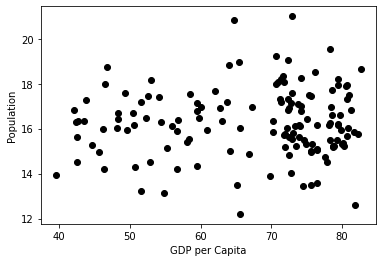

In [229]:
gapminder["logPop"] = np.log(gapminder["pop"])
gap_07 = gapminder[gapminder["year"] == 2007]


plt.scatter(x = gap_07["lifeExp"], y = gap_07["logPop"], color = "black")

plt.xlabel("Life Expectancy")
plt.ylabel("Population (log)")

plt.show()

*What we're doing*

/tmp/ipykernel_142/1400156691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_07["cluster"] = result.labels_


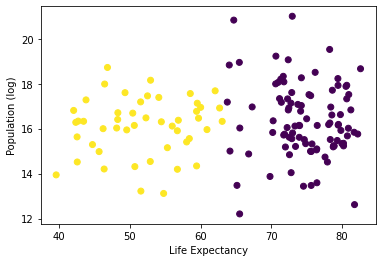

In [233]:
from sklearn.cluster import KMeans

km = KMeans(random_state = 42, n_clusters = 2) 
result = km.fit(gap_07[["lifeExp", "logPop"]])
gap_07["cluster"] = result.labels_

plt.scatter(x = gap_07["lifeExp"], y = gap_07["logPop"], c = gap_07["cluster"])

plt.xlabel("Life Expectancy")
plt.ylabel("Population (log)")

plt.show()

Adding clusters

/tmp/ipykernel_142/2540464740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_07["cluster"] = result.labels_


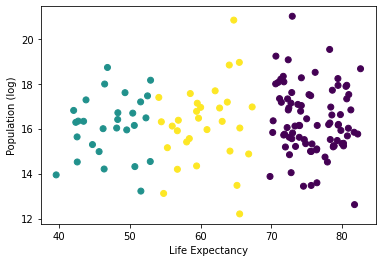

In [234]:
km = KMeans(random_state = 42, n_clusters = 3) 
result = km.fit(gap_07[["lifeExp", "logPop"]])
gap_07["cluster"] = result.labels_

plt.scatter(x = gap_07["lifeExp"], y = gap_07["logPop"], c = gap_07["cluster"])

plt.xlabel("Life Expectancy")
plt.ylabel("Population (log)")

plt.show()

Optimizing K with the Silhouette Coefficient

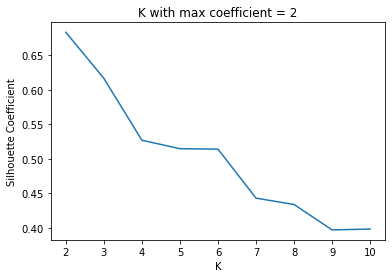

In [235]:
from sklearn.metrics import silhouette_score

def silhouette_score_plot(k, data):
    km = KMeans(n_clusters = k, random_state = 42)
    cluster_labels = km.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg

scores = pd.DataFrame({"k": [], 
                       "score": []})

for n in range(2, 11): 
    score = silhouette_score_plot(n , gap_07[["lifeExp", "logPop"]])
    scores = scores.append(pd.DataFrame({"k": [n], "score": [score]}))
    
plt.plot(scores["k"], scores["score"])

plt.xlabel("K")
plt.ylabel("Silhouette Coefficient")

plt.title("K with max coefficient = " + str(int(scores[scores["score"] == scores["score"].max()]["k"].squeeze())))

plt.show()

Non-plotable clustering

In [246]:
gap_model = gapminder[gapminder["year"] == 2007][["lifeExp", "pop", "gdpPercap"]]

km = KMeans(random_state = 42, n_clusters = 3) 
result = km.fit(gap_model)
gap_model["cluster"] = result.labels_

gap_model.groupby("cluster").agg({"lifeExp":"mean",
                                  "pop":"mean",
                                  "gdpPercap":"mean"})

,lifeExp,pop,gdpPercap
cluster,,,
0,66.825083,1.830543e+07,11711.787470
1,68.829500,1.214540e+09,3705.662630
2,69.560500,1.757021e+08,13150.365897


<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/stats/stats_underlines.gif?raw=true" style="height: 150px; width: 800px;">

# Reinforcement

<img src="https://github.com/social-lorax/howto_codebooks/blob/master/images/stats/stats_underlines.gif?raw=true" style="height: 150px; width: 800px;">

[Return to Python Page](https://social-lorax.github.io/guides/index_py.html)